In [1]:
!pip install tensorflow --no-cache-dir

   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB 1.4 MB/s eta 0:04:42
   ---------------------------------------- 0.1/385.0 MB 1.3 MB/s eta 0:04:52
   ---------------------------------------- 0.2/385.0 MB 1.9 MB/s eta 0:03:25
   ---------------------------------------- 0.3/385.0 MB 2.2 MB/s eta 0:02:56
   ---------------------------------------- 0.8/385.0 MB 3.8 MB/s eta 0:01:43
   ---------------------------------------- 1.1/385.0 MB 4.0 MB/s eta 0:01:36
   ---------------------------------------- 1.3/385.0 MB 4.3 MB/s eta 0:01:30
   ---------------------------------------- 1.6/385.0 MB 4.5 MB/s eta 0:01:26
   ---------------------------------------- 1.9/385.0 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 2.1/385.0 MB 4.9 MB/s eta 0:01:19
   ---------------------------------------- 2.4/385.0 MB 5.0 MB/s eta 0:01:17
   ---------------------------------------- 2.7/385.0 MB 5.1 MB/s eta 0


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: C:\Users\cavlc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb

In [3]:
# Load data
train_path = r'C:\Users\cavlc\OneDrive\Desktop\Pinnacle Full-Stack Intern\Pinnacle-Full-Stacks-Intern\Movie Genre Classification\Genre Classification Dataset\train_data.txt'
test_path = r'C:\Users\cavlc\OneDrive\Desktop\Pinnacle Full-Stack Intern\Pinnacle-Full-Stacks-Intern\Movie Genre Classification\Genre Classification Dataset\test_data.txt'
solution_path = r'C:\Users\cavlc\OneDrive\Desktop\Pinnacle Full-Stack Intern\Pinnacle-Full-Stacks-Intern\Movie Genre Classification\Genre Classification Dataset\test_data_solution.txt'

# Read data
train_data = pd.read_csv(train_path, delimiter=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
test_data = pd.read_csv(test_path, delimiter=':::', names=['ID', 'TITLE', 'DESCRIPTION'], engine='python')
solution_data = pd.read_csv(solution_path, delimiter=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

# Prepare data
X_train = train_data['DESCRIPTION']
y_train = train_data['GENRE']
X_test = test_data['DESCRIPTION']
y_test_actual = solution_data['GENRE']

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cavlc\\OneDrive\\Desktop\\Pinnacle Full-Stack Intern\\Pinnacle-Full-Stacks-Intern\\Movie Genre Classification\\Genre Classification Dataset\\train_data.txt'

In [4]:
# Interpretation of Confusion Matrices
interpretations = {
    'Logistic Regression': 'The confusion matrix displays the counts of correct and incorrect genre classifications made by the Logistic Regression model. Each diagonal element represents the number of correct predictions for each genre. Off-diagonal elements indicate misclassifications where the actual genre was different from the predicted genre. Darker shades along the diagonal signify higher accuracy for those specific genres.',
    'K-Nearest Neighbors (K-NN)': 'This confusion matrix shows how well the K-NN classifier performed in predicting movie genres. Diagonal elements indicate the number of correct predictions for each genre. Off-diagonal elements represent misclassifications, where the predicted genre differed from the actual genre. Colors along the diagonal give a visual indication of accuracy, with darker shades indicating higher accuracy for specific genres.',
    'Random Forest': 'The confusion matrix illustrates the Random Forest classifiers performance in predicting movie genres. Each diagonal cell shows the count of correct predictions for each genre. Off-diagonal cells represent misclassifications where the predicted genre did not match the actual genre. Darker shades on the diagonal suggest higher accuracy for those particular genres.',
    'XGBoost': 'This confusion matrix displays the classification results of the XGBoost classifier for movie genres. Diagonal elements show the number of correct predictions for each genre. Off-diagonal elements indicate misclassifications, where the predicted genre differed from the actual genre. The intensity of colors on the diagonal reflects the accuracy, with darker colors indicating higher accuracy for specific genres.',
    'LSTM (Deep Learning)': 'The confusion matrix visualizes how well the LSTM model performed in predicting movie genres. Each diagonal cell represents the count of correct predictions for each genre. Off-diagonal cells show misclassifications where the predicted genre did not match the actual genre. Darker shades along the diagonal indicate higher accuracy for those specific genres.',
    'Multinomial Naive Bayes (Multinomial NB)': 'This confusion matrix illustrates the performance of the Multinomial Naive Bayes classifier in predicting movie genres. Diagonal elements show the number of correct predictions for each genre. Off-diagonal elements represent misclassifications where the predicted genre differed from the actual genre. Darker shades on the diagonal suggest higher accuracy for those particular genres.',
    'Support Vector Machine (SVM)': 'The confusion matrix displays how well the SVM classifier performed in predicting movie genres. Each diagonal cell indicates the number of correct predictions for each genre. Off-diagonal cells show misclassifications where the predicted genre did not match the actual genre. Darker shades along the diagonal signify higher accuracy for those specific genres.'
}


# Define a function to plot confusion matrix
def plot_confusion_matrix(title, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix ({title})')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.figtext(0.5, -0.22, f'{title} Model : {interpretations[title]}', wrap=True, horizontalalignment='center', fontsize=20)
    plt.show()

Accuracy for 'Logistic Regression': 0.5945940959409594
Classification Report for 'Logistic Regression':

               precision    recall  f1-score   support

      action        0.51      0.30      0.37      1314
       adult        0.64      0.25      0.36       590
   adventure        0.67      0.16      0.25       775
   animation        0.61      0.04      0.08       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.60      0.57      7446
       crime        0.39      0.03      0.06       505
 documentary        0.68      0.87      0.76     13096
       drama        0.55      0.79      0.65     13612
      family        0.48      0.08      0.14       783
     fantasy        0.61      0.03      0.06       322
   game-show        0.91      0.50      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.57      0.61      2204
       music        0.68      0.46      0.55       731
     musical  

c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

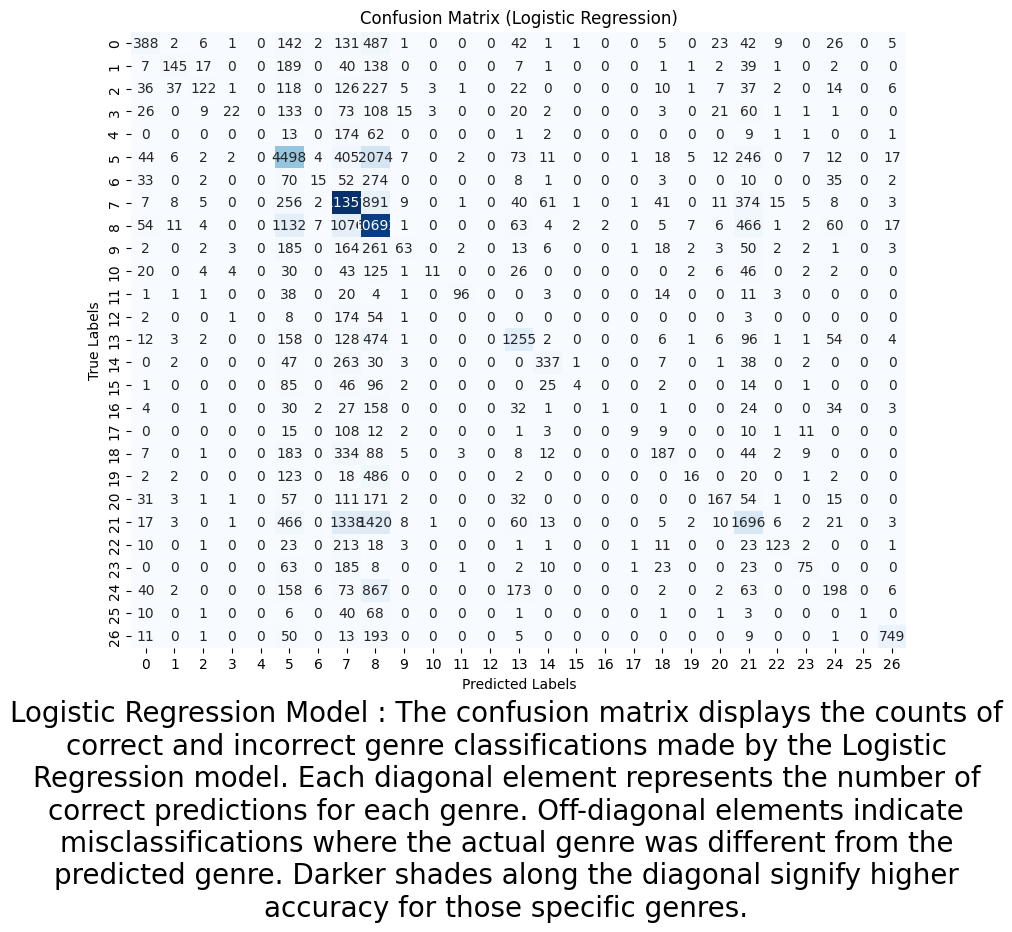

In [5]:
#============
# Logistic Regression
#============

# Ensure that y_test_actual is properly encoded using label_encoder
y_test_actual_encoded = label_encoder.transform(y_test_actual)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train_encoded)

# Predict on test set
y_test_pred_logreg = logreg.predict(X_test_tfidf)

# Calculate accuracy
accuracy_test_logreg = accuracy_score(y_test_actual_encoded, y_test_pred_logreg)
print(f"Accuracy for 'Logistic Regression': {accuracy_test_logreg}")

# Print classification report
print(f"Classification Report for 'Logistic Regression':\n")
print(classification_report(y_test_actual_encoded, y_test_pred_logreg, target_names=label_encoder.classes_))

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix('Logistic Regression', y_test_actual_encoded, y_test_pred_logreg)

Accuracy for 'K-Nearest Neighbors (K-NN)': 0.41538745387453874
Classification Report for 'K-Nearest Neighbors (K-NN)':

               precision    recall  f1-score   support

      action        0.17      0.19      0.18      1314
       adult        0.25      0.22      0.24       590
   adventure        0.17      0.17      0.17       775
   animation        0.08      0.06      0.07       498
   biography        0.01      0.01      0.01       264
      comedy        0.28      0.30      0.29      7446
       crime        0.10      0.04      0.05       505
 documentary        0.52      0.72      0.60     13096
       drama        0.42      0.58      0.49     13612
      family        0.31      0.08      0.13       783
     fantasy        0.24      0.03      0.06       322
   game-show        0.64      0.62      0.63       193
     history        0.09      0.01      0.02       243
      horror        0.46      0.21      0.29      2204
       music        0.57      0.28      0.38       731

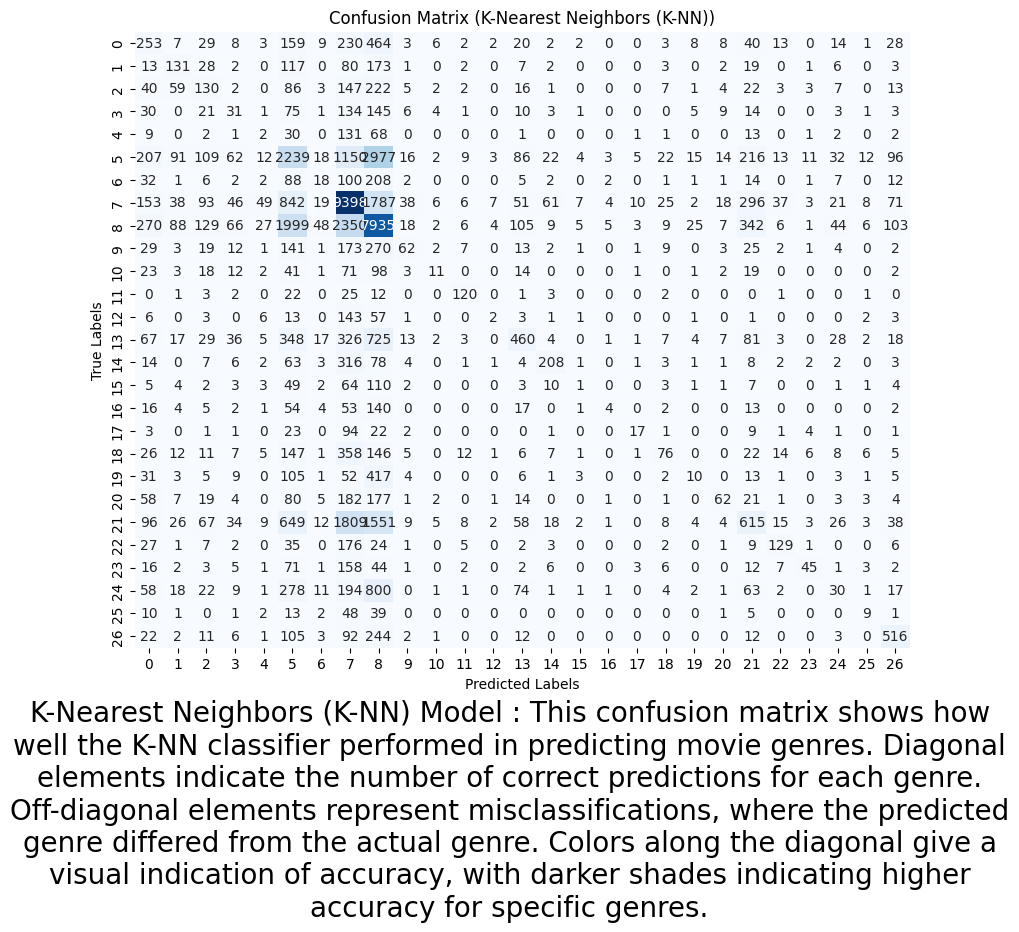

In [6]:
#============
# K-NN Classifier
#============

# Train K-NN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, y_train_encoded)

# Predict on test set
y_test_pred_knn = knn_classifier.predict(X_test_tfidf)

# Ensure y_test_actual is encoded
y_test_actual_encoded = label_encoder.transform(y_test_actual)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_actual_encoded, y_test_pred_knn)
print(f"Accuracy for 'K-Nearest Neighbors (K-NN)': {accuracy_knn}")

# Print classification report
print(f"Classification Report for 'K-Nearest Neighbors (K-NN)':\n")
print(classification_report(y_test_actual_encoded, y_test_pred_knn, target_names=label_encoder.classes_))

# Plot confusion matrix for K-NN
plot_confusion_matrix('K-Nearest Neighbors (K-NN)', y_test_actual_encoded, y_test_pred_knn)

Accuracy for 'Random Forest': 0.47042435424354245
Classification Report for 'Random Forest':

               precision    recall  f1-score   support

      action        1.00      0.00      0.01      1314
       adult        0.50      0.02      0.04       590
   adventure        0.75      0.05      0.10       775
   animation        0.09      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.23      0.32      7446
       crime        1.00      0.00      0.01       505
 documentary        0.53      0.89      0.66     13096
       drama        0.41      0.83      0.54     13612
      family        0.95      0.02      0.04       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.89      0.33      0.48       193
     history        0.00      0.00      0.00       243
      horror        0.78      0.05      0.09      2204
       music        0.82      0.08      0.15       731
     musical        0.67 

c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

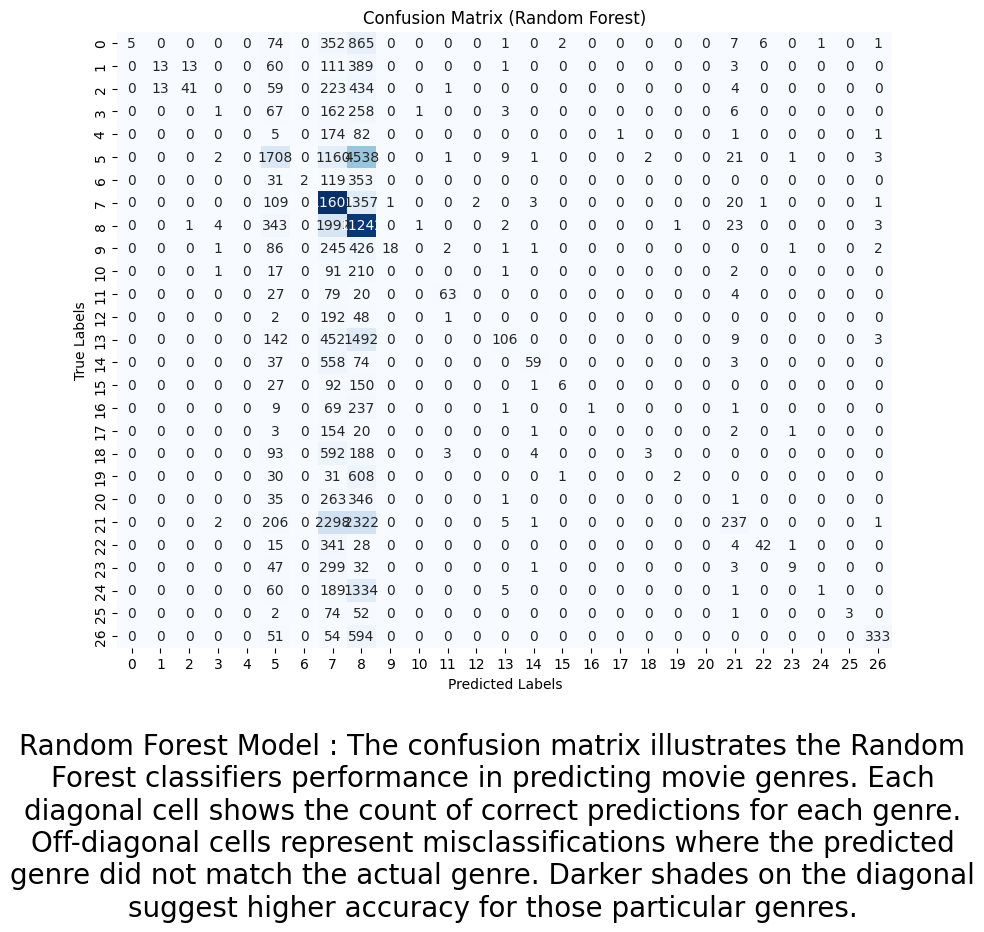

In [7]:
#============
# Random Forest Classifier
#============

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train_encoded)

# Predict on test set
y_test_pred_rf = rf_classifier.predict(X_test_tfidf)

# Ensure y_test_actual is encoded
y_test_actual_encoded = label_encoder.transform(y_test_actual)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_actual_encoded, y_test_pred_rf)
print(f"Accuracy for 'Random Forest': {accuracy_rf}")

# Print classification report
print(f"Classification Report for 'Random Forest':\n")
print(classification_report(y_test_actual_encoded, y_test_pred_rf, target_names=label_encoder.classes_))

# Plot confusion matrix for Random Forest
plot_confusion_matrix('Random Forest', y_test_actual_encoded, y_test_pred_rf)

Accuracy for 'XGBoost': 0.5291881918819188
Classification Report for 'XGBoost':

               precision    recall  f1-score   support

      action        0.54      0.13      0.20      1314
       adult        0.58      0.24      0.34       590
   adventure        0.60      0.15      0.24       775
   animation        0.37      0.06      0.11       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.39      0.45      7446
       crime        0.20      0.02      0.03       505
 documentary        0.59      0.84      0.69     13096
       drama        0.46      0.79      0.58     13612
      family        0.46      0.05      0.09       783
     fantasy        0.46      0.02      0.04       322
   game-show        0.78      0.58      0.67       193
     history        0.17      0.00      0.01       243
      horror        0.64      0.40      0.50      2204
       music        0.63      0.43      0.51       731
     musical        0.14      0.02    

c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

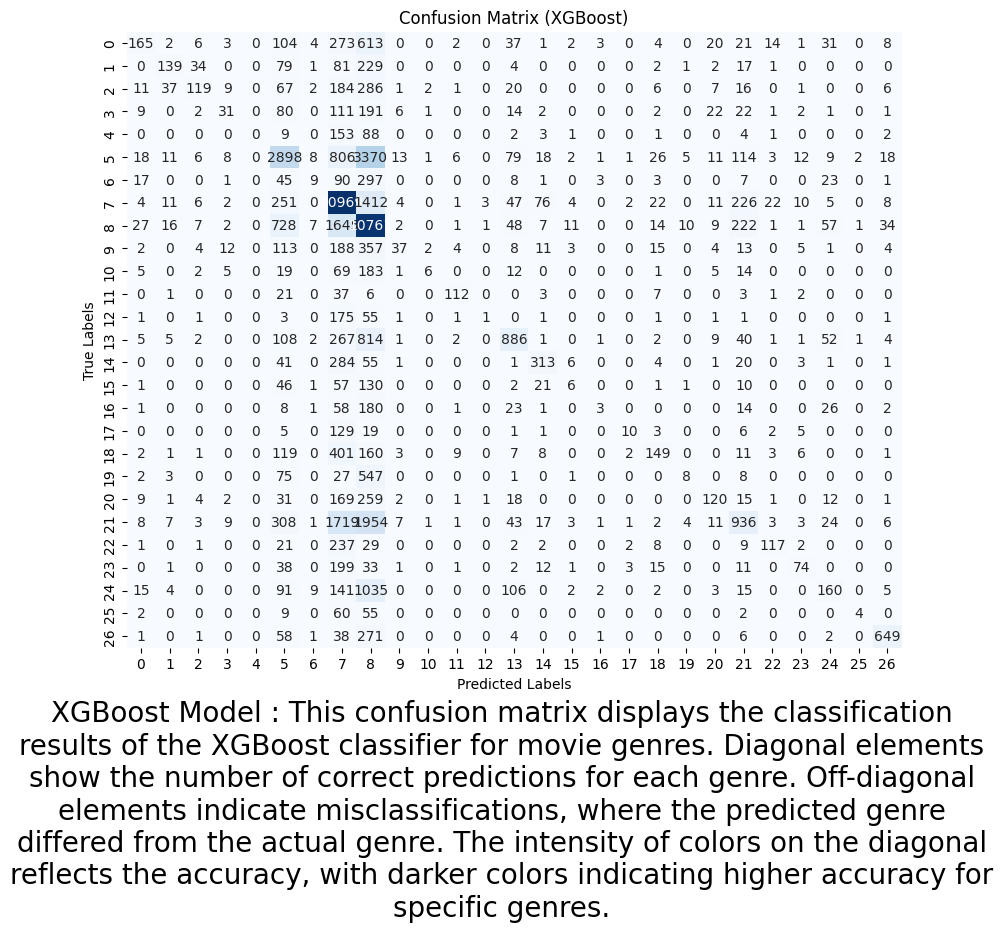

In [8]:
#============
#XGBoost Classifier
#============


# Train XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(max_depth=6, n_estimators=100, learning_rate=0.1, random_state=42)
xgb_classifier.fit(X_train_tfidf, y_train_encoded)

# Predict on test set
y_test_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Ensure y_test_actual is encoded
y_test_actual_encoded = label_encoder.transform(y_test_actual)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_actual_encoded, y_test_pred_xgb)
print(f"Accuracy for 'XGBoost': {accuracy_xgb}")

# Print classification report
print(f"Classification Report for 'XGBoost':\n")
print(classification_report(y_test_actual_encoded, y_test_pred_xgb, target_names=label_encoder.classes_))

# Plot confusion matrix for XGBoost
plot_confusion_matrix('XGBoost', y_test_actual_encoded, y_test_pred_xgb)

Epoch 1/10


c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1356/1356 ━━━━━━━━━━━━━━━━━━━━ 136s 99ms/step - accuracy: 0.3502 - loss: 2.2396 - val_accuracy: 0.4653 - val_loss: 1.8318
Epoch 2/10
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 134s 99ms/step - accuracy: 0.5300 - loss: 1.6390 - val_accuracy: 0.5317 - val_loss: 1.6124
Epoch 3/10
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 134s 99ms/step - accuracy: 0.6212 - loss: 1.3070 - val_accuracy: 0.5492 - val_loss: 1.5671
Epoch 4/10
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 134s 99ms/step - accuracy: 0.6913 - loss: 1.0614 - val_accuracy: 0.5412 - val_loss: 1.6233
Epoch 5/10
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 134s 99ms/step - accuracy: 0.7589 - loss: 0.8426 - val_accuracy: 0.5321 - val_loss: 1.7194
Epoch 6/10
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 134s 99ms/step - accuracy: 0.8116 - loss: 0.6512 - val_accuracy: 0.5159 - val_loss: 1.9419
Epoch 7/10
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 134s 99ms/step - accuracy: 0.8610 - loss: 0.4838 - val_accuracy: 0.5053 - val_loss: 2.1682
Epoch 8/10
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 135s 99ms/step - accuracy: 0.9019 - lo

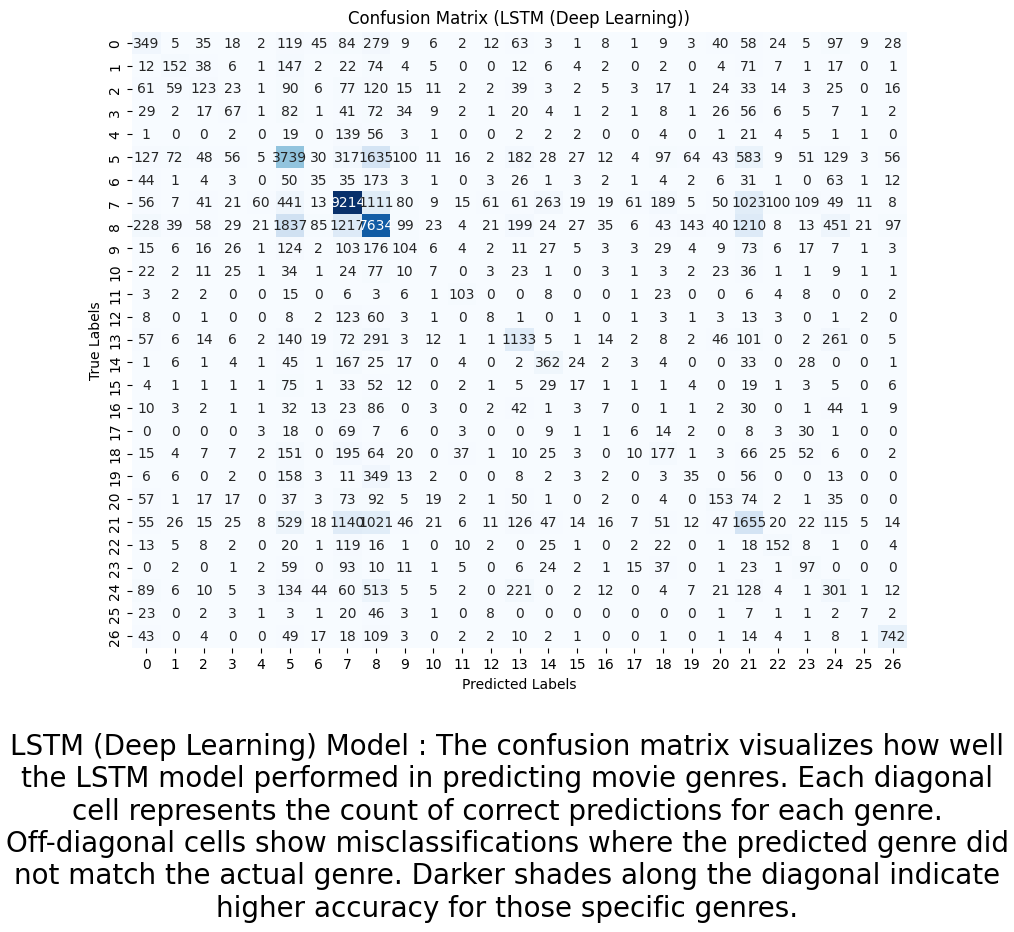

In [9]:
#============
#LSTM
#============


# Tokenize and pad sequences for LSTM
max_num_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train LSTM model
model_lstm.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Predict on test set
y_test_pred_lstm = model_lstm.predict(X_test_padded).argmax(axis=1)

# Ensure y_test_actual is encoded
y_test_actual_encoded = label_encoder.transform(y_test_actual)

# Calculate accuracy
accuracy_test_lstm = accuracy_score(y_test_actual_encoded, y_test_pred_lstm)
print(f"Accuracy for 'LSTM (Deep Learning)': {accuracy_test_lstm}")

# Print classification report
print(f"Classification Report for 'LSTM (Deep Learning)':\n")
print(classification_report(y_test_actual_encoded, y_test_pred_lstm, target_names=label_encoder.classes_))

# Plot confusion matrix for LSTM
plot_confusion_matrix('LSTM (Deep Learning)', y_test_actual_encoded, y_test_pred_lstm)

Accuracy for 'Multinomial Naive Bayes (Multinomial NB)': 0.5092066420664206
Classification Report for 'Multinomial Naive Bayes (Multinomial NB)':

               precision    recall  f1-score   support

      action        0.57      0.03      0.06      1314
       adult        0.46      0.02      0.04       590
   adventure        0.77      0.04      0.08       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.40      0.46      7446
       crime        0.00      0.00      0.00       505
 documentary        0.56      0.89      0.69     13096
       drama        0.44      0.84      0.58     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        1.00      0.02      0.04       193
     history        0.00      0.00      0.00       243
      horror        0.77      0.23      0.35      2204
       music        0.89   

c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cavlc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

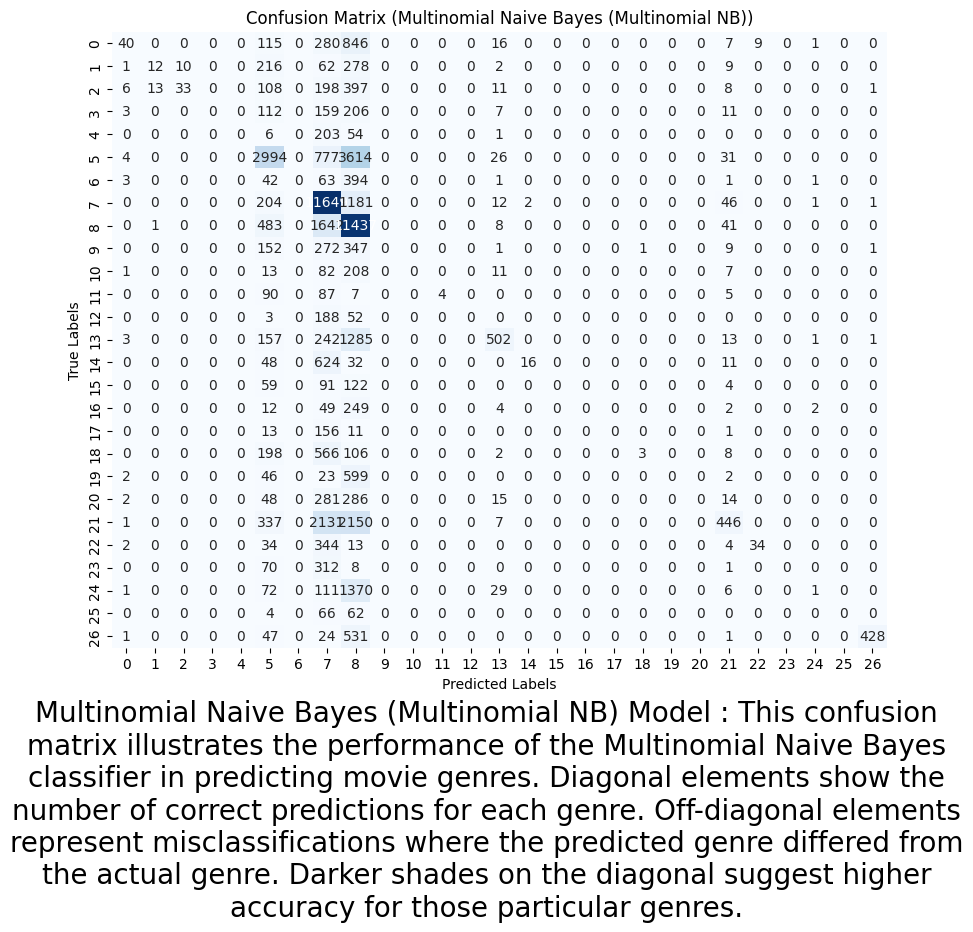

In [10]:
#============
#Multinomial NB
#============


# Train Multinomial Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train_encoded)

# Predict on test set
y_test_pred_nb = nb_classifier.predict(X_test_tfidf)

# Ensure y_test_actual is encoded
y_test_actual_encoded = label_encoder.transform(y_test_actual)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test_actual_encoded, y_test_pred_nb)
print(f"Accuracy for 'Multinomial Naive Bayes (Multinomial NB)': {accuracy_nb}")

# Print classification report
print(f"Classification Report for 'Multinomial Naive Bayes (Multinomial NB)':\n")
print(classification_report(y_test_actual_encoded, y_test_pred_nb, target_names=label_encoder.classes_))

# Plot confusion matrix for Multinomial NB
plot_confusion_matrix('Multinomial Naive Bayes (Multinomial NB)', y_test_actual_encoded, y_test_pred_nb)

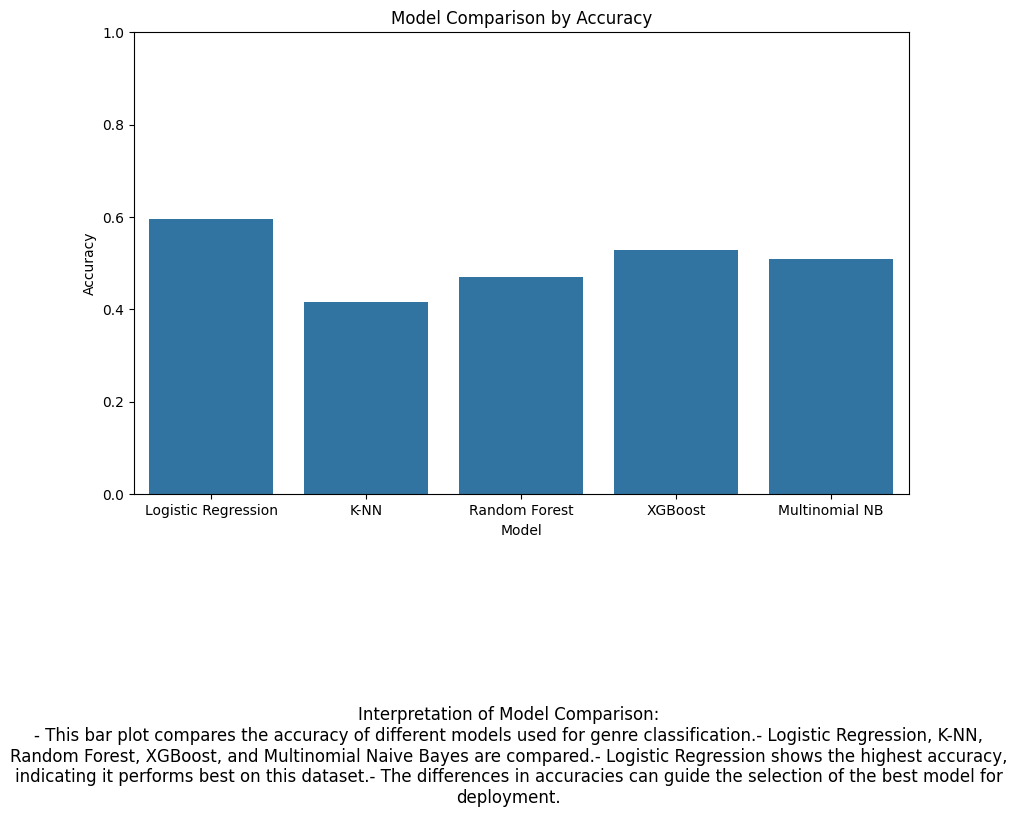

In [11]:
# Plotting Accuracy of Different Models
models = ['Logistic Regression', 'K-NN', 'Random Forest', 'XGBoost', 'Multinomial NB']
accuracies = [accuracy_test_logreg, accuracy_knn, accuracy_rf, accuracy_xgb, accuracy_nb]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison by Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

interpretation_text = (
    "Interpretation of Model Comparison:\n"
    "- This bar plot compares the accuracy of different models used for genre classification."
    "- Logistic Regression, K-NN, Random Forest, XGBoost, and Multinomial Naive Bayes are compared."
    "- Logistic Regression shows the highest accuracy, indicating it performs best on this dataset."
    "- The differences in accuracies can guide the selection of the best model for deployment."
).format(accuracy_test_logreg, accuracy_knn, accuracy_rf, accuracy_xgb, accuracy_nb)

plt.figtext(0.5, -0.4, interpretation_text, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

<ipython-input-12-5800177997c2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=data, palette='viridis')


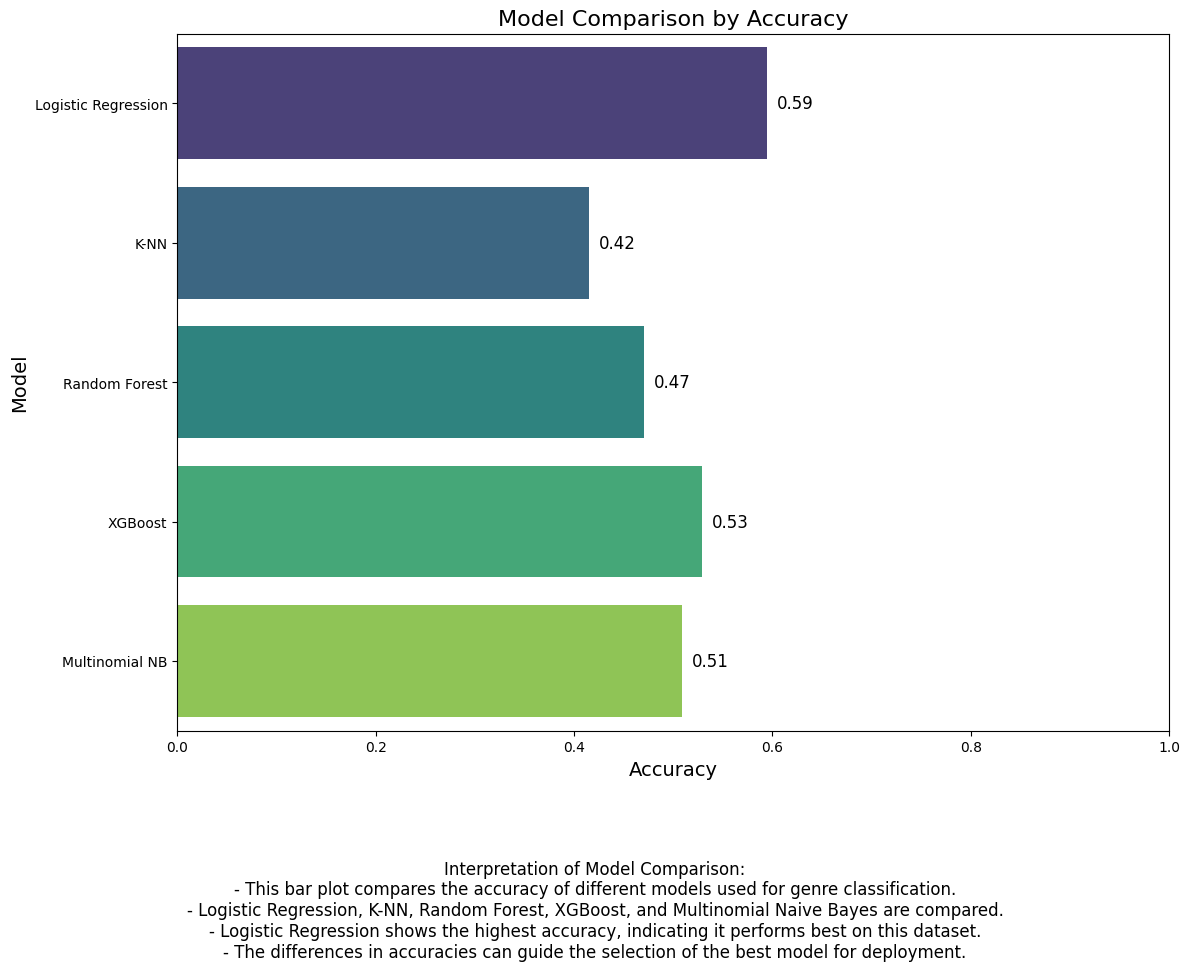

In [12]:
# Define the models and their accuracies
models = ['Logistic Regression', 'K-NN', 'Random Forest', 'XGBoost', 'Multinomial NB']
accuracies = [accuracy_test_logreg, accuracy_knn, accuracy_rf, accuracy_xgb, accuracy_nb]

# Create a DataFrame for easier plotting with seaborn
data = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=data, palette='viridis')

# Adding accuracy labels to the bars
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f"{value:.2f}", color='black', va='center', fontsize=12)

# Adding titles and labels
plt.title('Model Comparison by Accuracy', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xlim(0, 1)

# Adding interpretation text
interpretation_text = (
    "Interpretation of Model Comparison:\n"
    "- This bar plot compares the accuracy of different models used for genre classification.\n"
    "- Logistic Regression, K-NN, Random Forest, XGBoost, and Multinomial Naive Bayes are compared.\n"
    "- Logistic Regression shows the highest accuracy, indicating it performs best on this dataset.\n"
    "- The differences in accuracies can guide the selection of the best model for deployment."
)

# Adding interpretation text below the plot
plt.figtext(0.5, -0.2, interpretation_text, wrap=True, horizontalalignment='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()